In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv
/kaggle/input/data-test-and-train/House Price Regression Tecnique/sample_submission.csv
/kaggle/input/data-test-and-train/House Price Regression Tecnique/data_description.txt
/kaggle/input/data-test-and-train/House Price Regression Tecnique/train.csv
/kaggle/input/data-test-and-train/House Price Regression Tecnique/Project On House Price data .ipynb
/kaggle/input/data-test-and-train/House Price Regression Tecnique/test.csv


In [2]:
# arbitrary value imputation
# it consists of replacing nan by an arbitrary value
# this technique was derived by kaggle competition

# 5.arbitrary value imputation

In [3]:
df=pd.read_csv('../input/titanic-machine-learning-from-disaster/train.csv',usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
# low outlier value and high outlier value 
def impute_nan(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100)
    df[variable+'_Zero']=df[variable].fillna(0)

<AxesSubplot:>

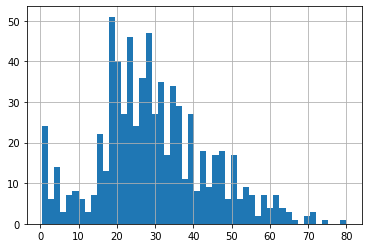

In [6]:
df["Age"].hist(bins=50)

In [7]:
# arbitrary values
# it should be more frequently present 

# CAREGORICAL COMPUTATION

In [8]:
# 1.frequent category imputation
df1=pd.read_csv('../input/data-test-and-train/House Price Regression Tecnique/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df1

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [9]:
df1.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [10]:
df1.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [11]:
df1["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

<AxesSubplot:xlabel='BsmtQual'>

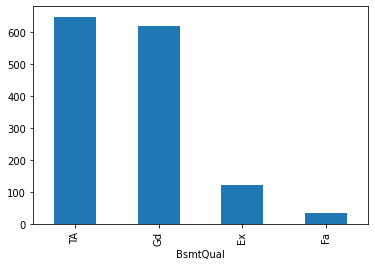

In [12]:
# compute the frequency with every feature 
df1.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

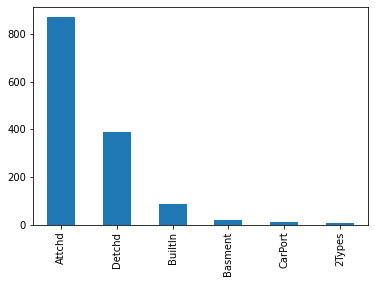

In [13]:
df1["GarageType"].value_counts().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

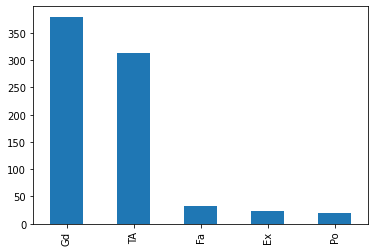

In [14]:
df1["FireplaceQu"].value_counts().sort_values(ascending=False).plot.bar()

In [15]:
df1['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [16]:
df1['GarageType'].value_counts().index[0]

'Attchd'

In [17]:
df1.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [18]:
# impute function 
def impute_nan(df1,variable):
    most_frequent_category=df[variable].value_counts.index[0]
    df[variable].fillna(most_frequent_category,inplace=True)